# <strong>Titanic - Machine Learning Survivor Prediction</strong> </br>


<b>Erickson Figueroa</b><br>
Data Science, Machine Learning & AI

<img src = "https://raw.githubusercontent.com/erickson-figueroa/machine-learning-projects/main/Tree-Based%20Classification/the%20titanic%20sinking.jpeg" width = "400" height = "300">

## Data dictionary

- Survival --> Survive 0 = No, 1 = Yes (THIS IS THE TARGET VARIABLE - THE MOST IMPORTANT PREDICTOR)
- pclass --> Ticket class 1 = First Class, 2 = Second Class, 3 = Third Class
- sex --> Gender
- Age --> Age in years
- sibsp --> # of siblings/spouses aboard the Titanic
- parch --> # of parents/children aboard the Titanic
- ticket --> Ticket number
- fare --> Passenger fare
- cabin --> Cabin number on the ship
- embarked --> Port of embarkation where the ship sailed from C = Cherbourg, Q = Queenstown, S = Southampton

<b>Notes on the variables</b>

pclass: An approximation of socioeconomic status (SES): </br>

- 1st = High
- 2nd = Medium
- 3rd = Low

Age: The age is fractional if less than 1. If the age is estimated, it is in the form of xx.5.

sibsp: The dataset defines family relationships in this way... </br>

- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relationships in the following way... </br>

- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children traveled only with a nanny, therefore parch=0 for them.

# A bit of theory to understand better
<p>This is a labeled dataset. This means that it already has the target variable, Survival, indicating whether a passenger survived or not. Being a labeled dataset, it falls under the category of supervised learning models.</p>

<p>-> A machine learning model is considered supervised when it is trained using a dataset that has been previously labeled.
This means that each data point in the training set has an associated output, also known as the target or response variable.</p>

<b>Example:</b> </br>
<p>Imagine you are training a machine learning model to classify images of cats and dogs. To do this,
you would have a dataset of images, each labeled as either "cat" or "dog".
The model would analyze the images and learn to identify the features that distinguish cats from dogs. Once trained,
the model could be used to classify new images of animals, even if they are not in the training dataset.</p>

<p>In this project, we use a <b>supervised learning algorithm called: Decision Tree</b>
which basically predicts whether something is or isn't, a binary value 0 - 1.</p>

<b>This algorithm uses mathematical concepts such as:</b> (search these concepts online to better understand how everything works)

- Information Gain
- Entropy
- Gini Index
- CCP Pruning (Pruning/Cutting) (The pre-pruning technique refers to the early stopping of the decision tree growth)

## 1. <b>Importing Libraries</b>

In [1]:
# Data wrangling
import pandas as pd
import numpy as np
import missingno
from collections import Counter

# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns


# Machine learning models
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split


# Model evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

## 2. <b>Importing the data</b>
Let's convert the train.csv into a pandas dataframe

In [3]:
dataset_url = 'https://raw.githubusercontent.com/erickson-figueroa/machine-learning-projects/main/Tree-Based%20Classification/train.csv'

train  = pd.read_csv(dataset_url)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  876 non-null    int64  
 1   Survived     876 non-null    int64  
 2   Pclass       876 non-null    int64  
 3   Name         876 non-null    object 
 4   Sex          876 non-null    object 
 5   Age          876 non-null    float64
 6   SibSp        876 non-null    int64  
 7   Parch        876 non-null    int64  
 8   Ticket       876 non-null    object 
 9   Fare         876 non-null    float64
 10  Cabin        876 non-null    object 
 11  Embarked     876 non-null    object 
 12  Sex_Male     876 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 89.1+ KB


## 3. <b>Exploratory Data Analysis (EDA)</b>

### Checking missing values:

In [ ]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
train.isnull().sum().sort_values(ascending=False)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Sex_Male       0
dtype: int64

<Axes: >

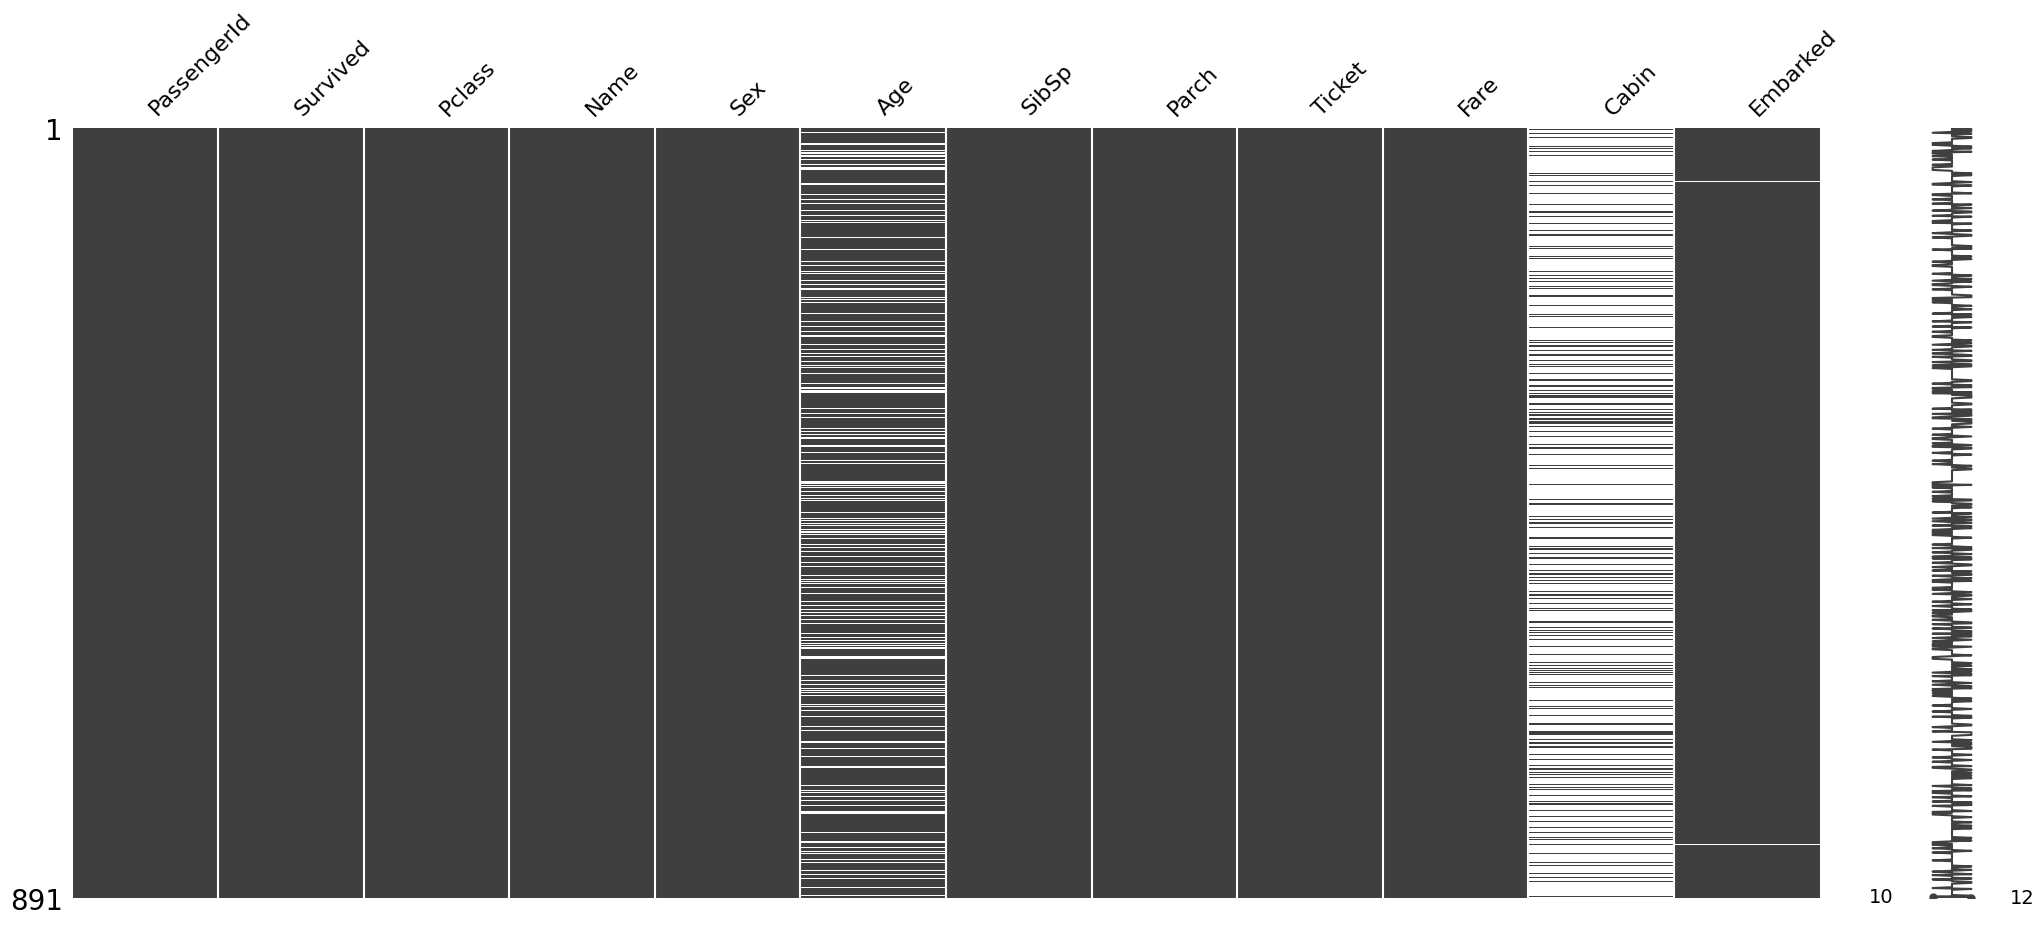

In [ ]:
# Plotting where missing values come from
missingno.matrix(train)

([<matplotlib.patches.Wedge at 0x2983492a390>,
 [Text(0.8799412353436974, 0.6600783456089193, 'Age'),
  Text(-0.8799412353436974, -0.6600783456089193, 'Cabin')],
 [Text(0.47996794655110764, 0.36004273396850145, '20.5%'),
  Text(-0.47996794655110764, -0.36004273396850145, '79.5%')])

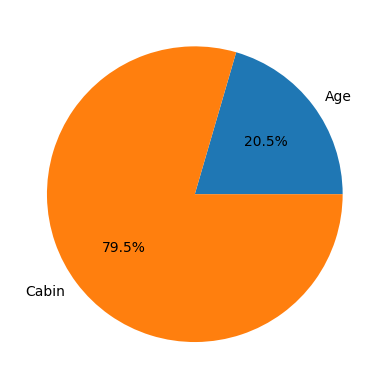

In [ ]:
# Counting null values for each column
age_null = train['Age'].isnull().sum()
cabin_null = train['Cabin'].isnull().sum()

# Plotting
labels = 'Age','Cabin'
columns = [age_null,cabin_null]
fig, ax = plt.subplots()
ax.set_title=("Missing Values")
ax.pie(columns, labels=labels, autopct='%1.1f%%')

We have <b>79.5%</b> of missing for Cabin and <b>20.5%</b> for Age.</br>
The percentage of missing data for the age column is relatively small but Cabin's is quite large. For the age I could do inputation and maybe for Cabin I could create another feature called: Cabin Unknown 1 or 0.

### Basic statistics:

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_Male
count,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000
mean,446.221461,0.384703,2.315068,29.182611,0.454338,0.358447,30.644862,0.649543
std,256.448939,0.486803,0.831550,13.095954,0.873203,0.783726,47.383619,0.477386
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,225.750000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,447.500000,0.000000,3.000000,26.000000,0.000000,0.000000,14.254150,1.000000
75%,667.250000,1.000000,3.000000,36.625000,1.000000,0.000000,30.017700,1.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200,1.000000


### Analyzing distributions - Categorical and Numerical Variables:

Let's check now our target variable: Survived (bool: 1 or 0):

In [ ]:
# Functions to plot each distribution and not repeat the code:

def plotting_distributions_v1(data_param, x_param):
    # Create countplot
    ax = sns.countplot(data=data_param, x=x_param)

    # Adding the annotations
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 10),
                    textcoords='offset points')

    plt.show()


def plotting_distributions_v2(data_param, x_param, hue_param, pallete_param):
    # Create countplot
    ax = sns.countplot(data=data_param, x=x_param, hue=hue_param, palette=pallete_param)

# Adding value labels
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 10),
                    textcoords='offset points')

# Show the plot
plt.show()

### Let's take a look at the gender distribution by crewmembers:

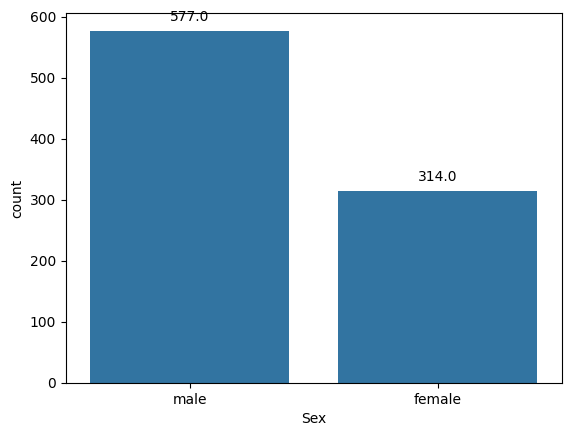

In [ ]:
# Checking genders
plotting_distributions_v1(data_param=train, x_param='Sex')

- The most crew members were male with 577 in total and female with 314.

### Now, how many survived and how many did not:

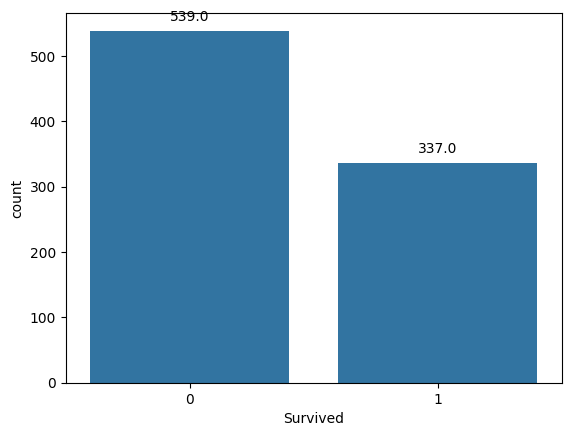

In [ ]:
# Checking suvivors
plotting_distributions_v1(data_param=train, x_param='Survived')

- 549 people did not survive while 342 survived </br>


### let's take a look at this surviving gender distribution:

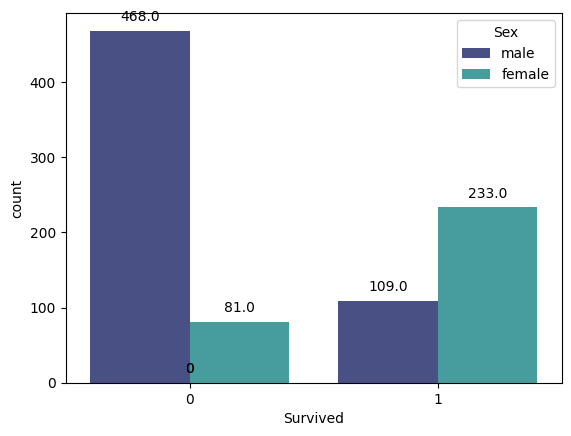

In [ ]:
plotting_distributions_v2(train,x_param='Survived', hue_param='Sex', pallete_param='mako')

- Most of the crew members who died were men 468 and women 81.
- For the survivors the majority were women 233 and men 109.

### Let's check by age:

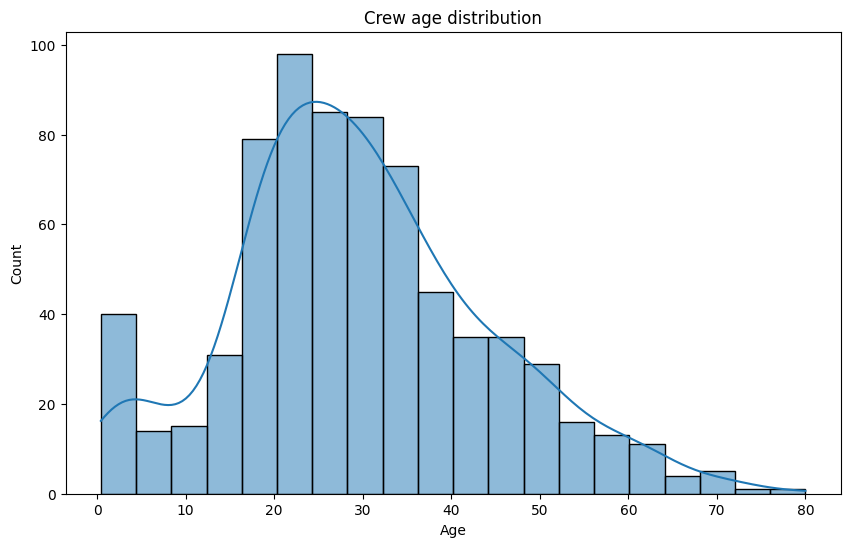

In [ ]:
# Only Age distribution

# Drop rows with missing Age values to a better histogram plotting
titanic_age = train.dropna(subset=['Age'])

plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_age, x='Age', bins=20, kde=True)
plt.title('Crew age distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

- The age distribution looks like a normal distribution type.
- The data points are symmetrically distributed. </br>
- The median of the ages is approximately equal to the mean.


### Let's calculate the mean, median and mode to verify the veracity of the distribution:

In [ ]:
# Calculate mean, median, and mode of ages
mean_age = titanic_age['Age'].mean()
median_age = titanic_age['Age'].median()
mode_age = titanic_age['Age'].mode().iloc[0]  # In case of multiple modes, I will take the first one

print(f"Mean Age: {mean_age:.2f}")
print(f"Median Age: {median_age}")
print(f"Mode Age: {mode_age}")

Mean Age: 29.70
Median Age: 28.0
Mode Age: 24.0


### Now, let's check the distribution of survivors by age and status (Survivor = Yes = 1, No = 0):

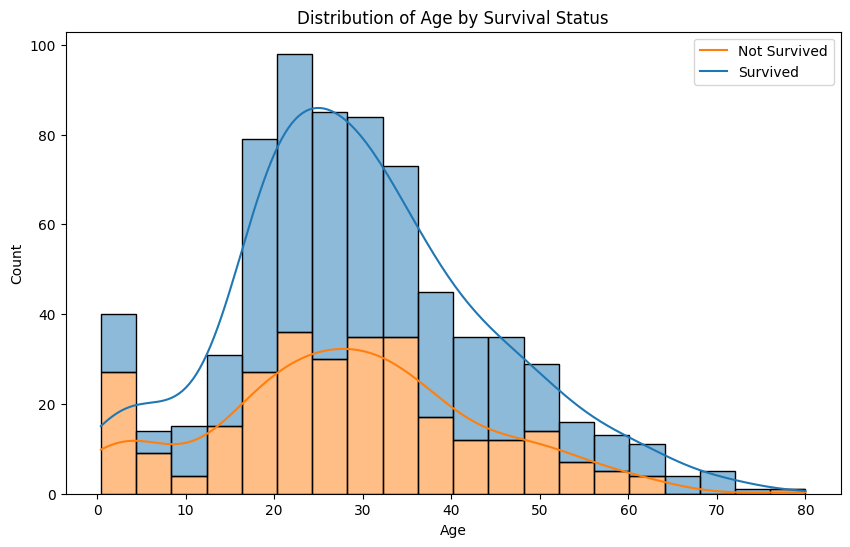

In [ ]:
# Age and Survived
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_age, x='Age', hue='Survived', multiple='stack', bins=20, kde=True)
plt.title('Distribution of Age by Survival Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(labels=['Not Survived', 'Survived'])
plt.show()

### Let's check by socio-economic class status:

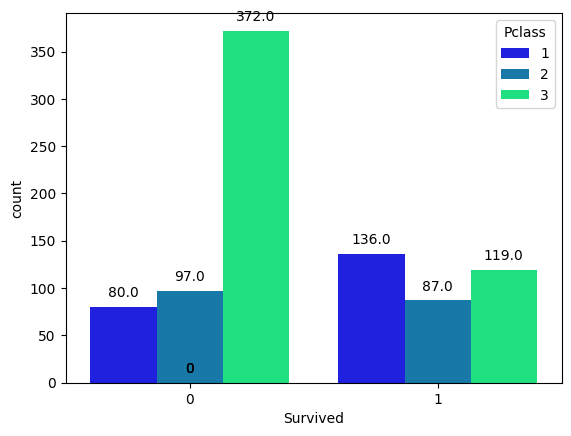

In [ ]:
plotting_distributions_v2(train,x_param='Survived', hue_param='Pclass', pallete_param='winter')

- We can observe that those who died the most were those of class 3 with 372 and those who survived the most were those of class 1 with 136. If we add the deaths of class 3 and the deaths of class 1 plus class 2, the difference is quite remarkable.

### We will now examine the number of family members in the crew:

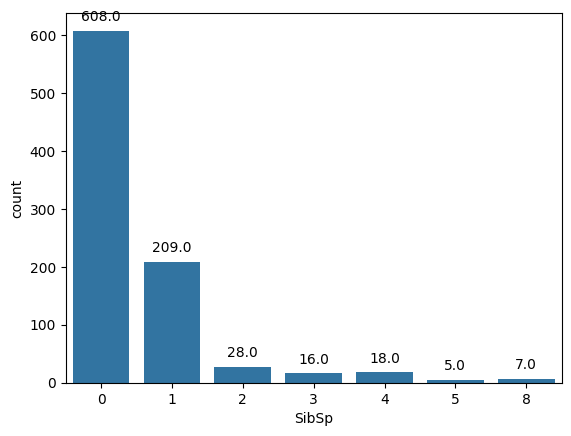

In [ ]:
# Checking siblings:
# The dataset defines family relations in this way...
# Sblings = brother, sister, stepbrother, stepsister
# Spouse = husband, wife (mistresses and fiancés were ignored)
plotting_distributions_v1(data_param=train, x_param='SibSp')

- It is visualized that most of the crew members were those who have no any siblings
- The second category were those who had at least one family member. 209 in total.

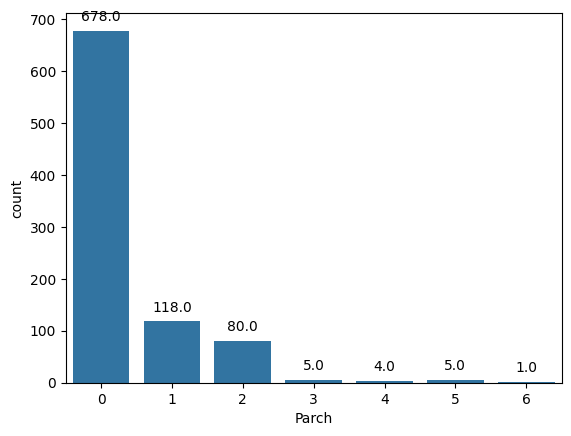

In [ ]:
# Checking Parch
# The dataset defines family relations in this way...
# Parent = mother, father
# Child = daughter, son, stepdaughter, stepson
# Some children travelled only with a nanny, therefore parch = 0 for them.
plotting_distributions_v1(data_param=train, x_param='Parch')

- It is visualized that most of the crew members were those who have no any Parch, 678 in total.
- The second category were those who had at least one family member. 118 in total.

### Let's check now the distribution of the cost of the ticket (Fare):

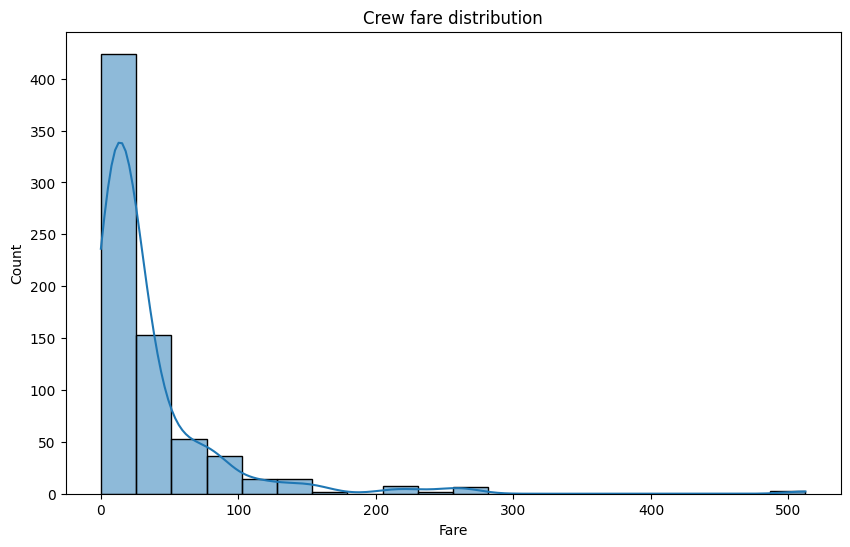

In [ ]:
# Checking the fare distribution (tickets)
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_age, x='Fare', bins=20, kde=True)
plt.title('Crew fare distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

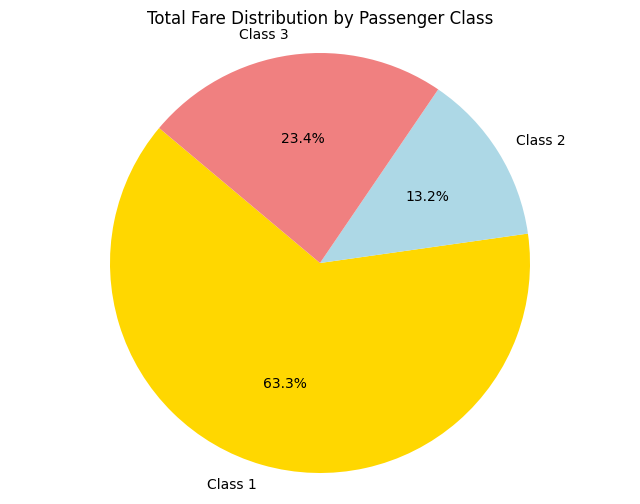

In [ ]:
# Plotting Fare and class distribution

# Group Fare by Pclass
fare_by_class = train.groupby('Pclass')['Fare'].sum()

# Plotting a pie chart
labels = ['Class 1', 'Class 2', 'Class 3']
plt.figure(figsize=(8, 6))
plt.pie(fare_by_class, labels=labels, autopct='%1.1f%%', startangle=140, colors=['gold', 'lightblue', 'lightcoral'])
plt.title('Total Fare Distribution by Passenger Class')
# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.show()

- It is obvious that Class 1 has the highest fare distribution.

### Let's Analize the Embarked column:

In [ ]:
# Counting values
train['Embarked'].value_counts(dropna=False)

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [ ]:
# Mean of survival by point of embarkation
train[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by = 'Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


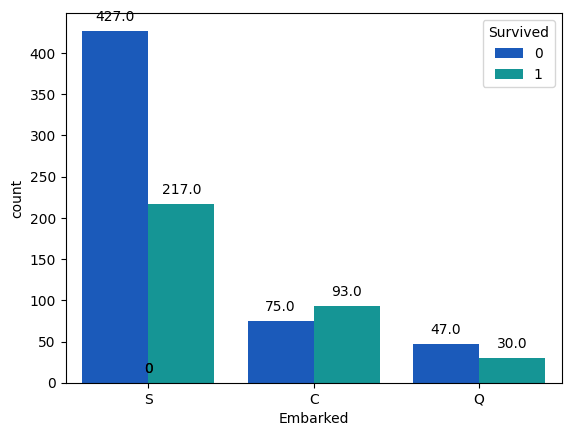

In [ ]:
# Checking embarking distribution for each class
plotting_distributions_v2(train,x_param='Embarked', hue_param='Survived', pallete_param='winter')

- Most of it is distributed in the embarked tripoulants in: S

## 4. <b>Data Cleaning</b>

It's time to fix the missing values of the ages. I'm going to use inputation instead of dropping those rows.

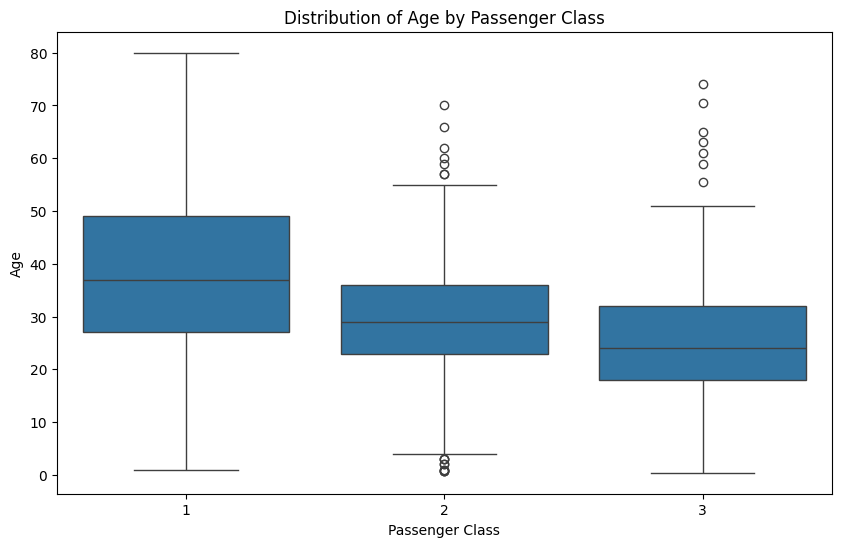

In [ ]:
# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=train, x='Pclass', y='Age')
plt.title('Distribution of Age by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

In [ ]:
# I will replace the missing values of the ages by calculating the mean for each class

# Calculate mean age for each class
mean_ages = train.groupby('Pclass')['Age'].mean()

# Function to fill missing ages based on passenger class
def fill_age(row):
    if pd.isnull(row['Age']):
        return mean_ages[row['Pclass']]
    else:
        return row['Age']

# Apply the function to fill missing ages
train['Age'] = train.apply(fill_age, axis=1)

# Verify the imputation
print(train[['Pclass', 'Age']])

     Pclass       Age
0         3  22.00000
1         1  38.00000
2         3  26.00000
3         1  35.00000
4         3  35.00000
..      ...       ...
886       2  27.00000
887       1  19.00000
888       3  25.14062
889       1  26.00000
890       3  32.00000

[891 rows x 2 columns]


### Let's check the null values for age again:

<Axes: >

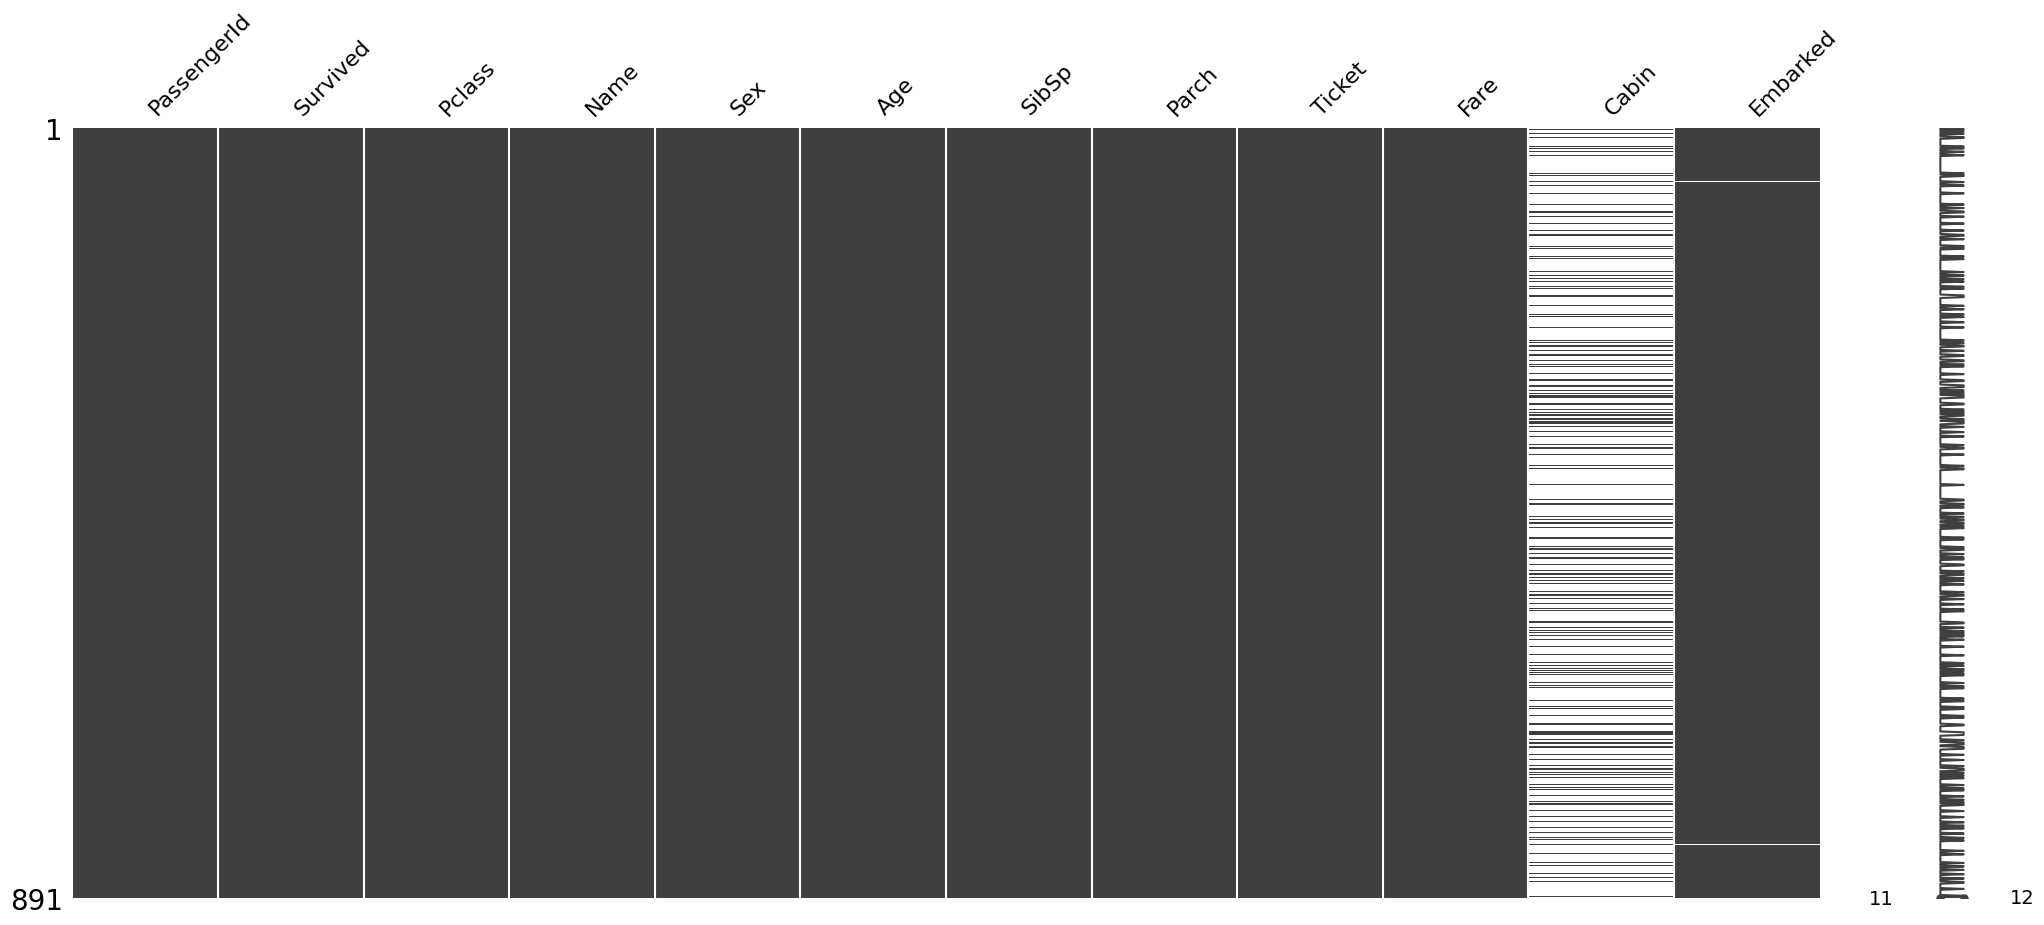

In [ ]:
missingno.matrix(train)

- It is verified that the age no longer contains null values

Now let's fix the Cabin column, but in this case, since there are so many null values, I will reemplace the missing by Unknown Cabin.

In [ ]:
# Replace missing values in 'Cabin' with 'Unknown Cabin'
train['Cabin'] = train['Cabin'].fillna('Unknown Cabin')

# Delete rows with null values in 'Embarked' column
train = train.dropna(subset=['Embarked'])

# Verify the replacement
print(train[['PassengerId', 'Cabin']])

     PassengerId          Cabin
0              1  Unknown Cabin
1              2            C85
2              3  Unknown Cabin
3              4           C123
4              5  Unknown Cabin
..           ...            ...
886          887  Unknown Cabin
887          888            B42
888          889  Unknown Cabin
889          890           C148
890          891  Unknown Cabin

[889 rows x 2 columns]


<Axes: >

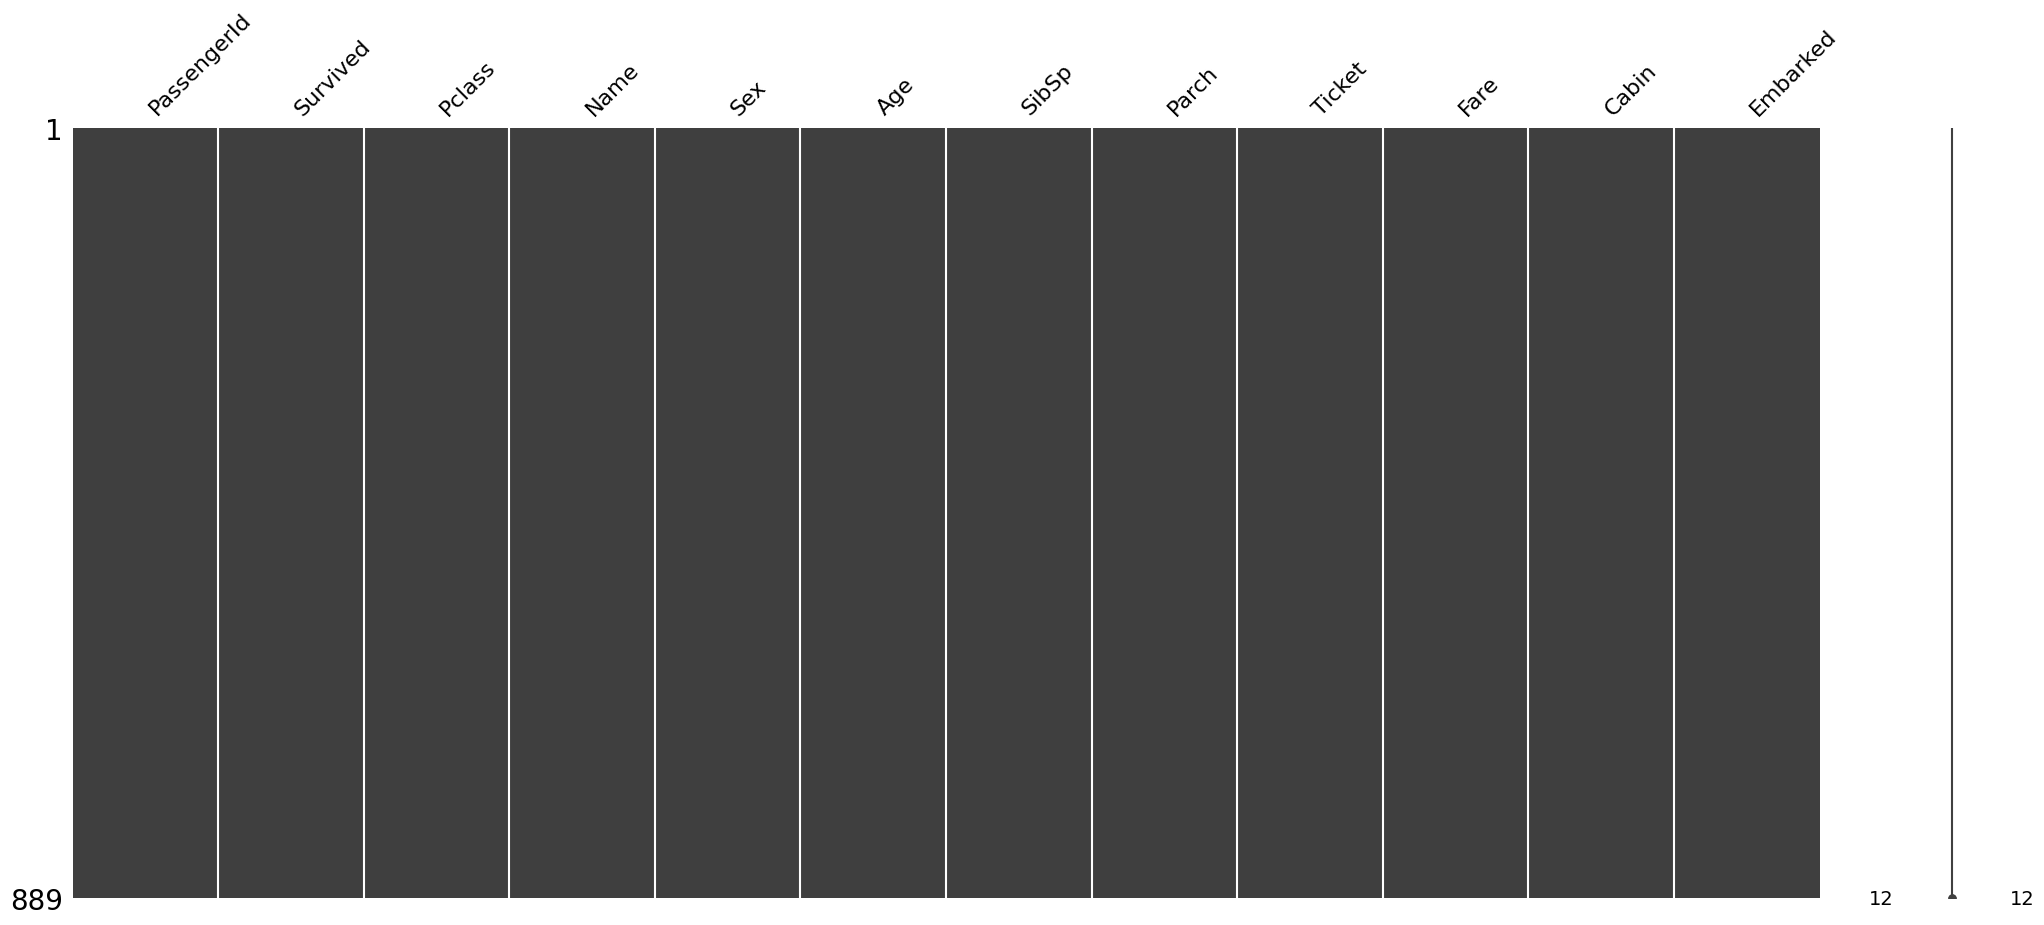

In [ ]:
# Let's check agani the missing value
missingno.matrix(train)

- We don't have missing values !!

### Detect and remove outliers in numerical variables
<p>Outliers are data points that have extreme values and they do not conform with the majority of the data. It is important to address this because outliers tend to skew our data towards extremes and can cause inaccurate model predictions.</p>

<p>The Tukey's method, also known as the Tukey's fences or Tukey's rule, is a commonly used technique for identifying and removing outliers in a dataset. It uses the interquartile range (IQR) to determine the boundaries of the data, beyond which data points are considered outliers.</p>


In [ ]:
# Function to detect outliers
def detect_outliers(df, n, features):
    """"
    This function will loop through a list of features and detect outliers in each one of those features. In each
    loop, a data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds
    third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range. Once the
    outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next
    feature and the process repeats until the very last feature is completed. Finally, using the list with outlier
    indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.
    """
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n)
    return multiple_outliers

outliers_to_drop = detect_outliers(train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 13 indices:  [438, 587, 745, 27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [ ]:
# Outliers in numerical variables
train.loc[outliers_to_drop, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
438,439,0,1,"Fortune, Mr. Mark",male,64.00000,1,4,19950,263.00,C23 C25 C27,S
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.00000,1,1,13567,79.20,B41,C
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.00000,1,1,WE/P 5735,71.00,B22,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00000,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.00000,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,25.14062,8,2,CA. 2343,69.55,Unknown Cabin,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,25.14062,8,2,CA. 2343,69.55,Unknown Cabin,S
201,202,0,3,"Sage, Mr. Frederick",male,25.14062,8,2,CA. 2343,69.55,Unknown Cabin,S
324,325,0,3,"Sage, Mr. George John Jr",male,25.14062,8,2,CA. 2343,69.55,Unknown Cabin,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.00000,3,2,19950,263.00,C23 C25 C27,S


In [ ]:
# Drop outliers and reset index

print("Before: {} rows".format(len(train)))
train = train.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(train)))

Before: 889 rows
After: 876 rows


### Now let's do feature encoding for the Age and Embarked columns:

In [ ]:
# Binary Encoded:
# Converts each category into binary digits; reduces dimensionality and preserves information

# Perform Binary Encoding for 'Sex'
train['Sex_Male'] = train['Sex'].apply(lambda x: 1 if x == 'male' else 0)

# One Hot Encoding:
# It creates a new binary column for each category, which is effective but
# can increase the dimensionality of the dataset

# Perform One Hot Encoding for 'Embarked'
train_encoded = pd.get_dummies(train, columns=['Embarked'], prefix='Embarked')

# Let's check the new encoded dataset
train_encoded.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_Male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown Cabin,1,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown Cabin,0,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown Cabin,1,False,False,True


### Now, Remove unnecessary columns:

In [ ]:
# Note: I think that the cabin also is not necessary.
train_encoded.drop(['PassengerId','Name','Sex','Ticket','Cabin'], axis=1, inplace=True)

train_encoded.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_Male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,False,False,True
1,1,1,38.0,1,0,71.2833,0,True,False,False
2,1,3,26.0,0,0,7.9250,0,False,False,True
3,1,1,35.0,1,0,53.1000,0,False,False,True
4,0,3,35.0,0,0,8.0500,1,False,False,True


### Finally, Rearrange the columns:

In [ ]:
# Move the 'Survived' column to the end
columns = [col for col in train_encoded.columns if col != 'Survived']
columns.append('Survived')
final_train_df = train_encoded.reindex(columns=columns)

final_train_df.head(5)

,Pclass,Age,SibSp,Parch,Fare,Sex_Male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,3,22.0,1,0,7.2500,1,False,False,True,0
1,1,38.0,1,0,71.2833,0,True,False,False,1
2,3,26.0,0,0,7.9250,0,False,False,True,1
3,1,35.0,1,0,53.1000,0,False,False,True,1
4,3,35.0,0,0,8.0500,1,False,False,True,0


In [ ]:
# Apply log transformation to Fare column to reduce skewness

final_train_df['Fare'] = final_train_df['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

Text(0.5, 1.0, 'Passenger Fare Distribution After Log Transformation')

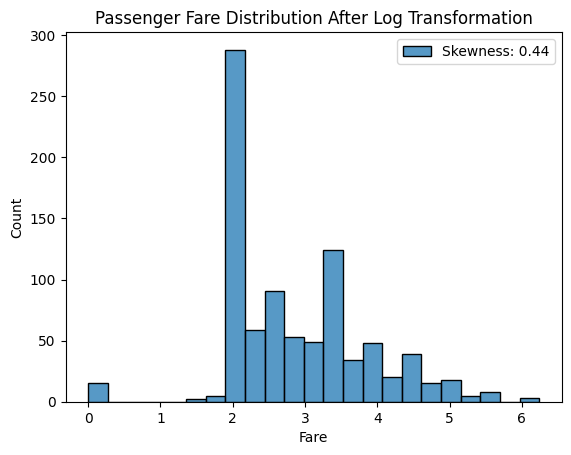

In [ ]:
# Passenger fare distribution after log transformation

sns.histplot(final_train_df['Fare'], label = 'Skewness: %.2f'%(final_train_df['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution After Log Transformation')

In [ ]:
# Convert Fare into integer

final_train_df['Fare'] = final_train_df['Fare'].astype('int')

## 5. <b>Modelling</b>

Split training data: We need to first split our training data into independent variables or predictor variables, represented by X as well as dependent variable or response variable, represented by Y. <br>

Y_train is the survived column in our training set and X_train is the other columns in the training set excluding the Survived column. Our models will learn to classify survival, Y_train based on all X_train and make predictions on X_test.

In [ ]:
# Separate features and target variable
X = final_train_df.drop('Survived', axis=1)
y = final_train_df['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Fit model to data and make predictions:

In [ ]:
# Initialize and train the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=101)
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred = decision_tree.predict(X_test)

# Calculate and print the accuracy
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print(f'Accuracy on training data: {acc_decision_tree}%')

Accuracy on training data: 94.86%


### Confusion matrix

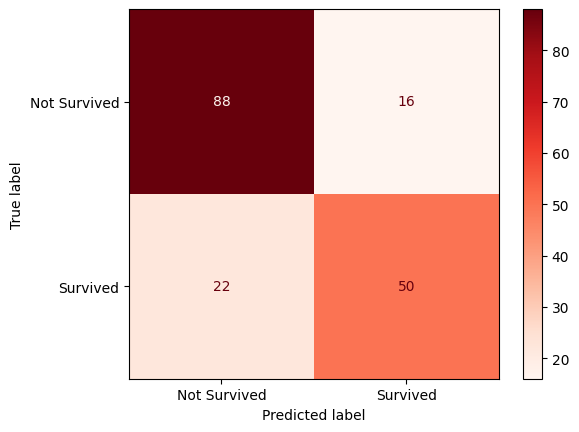

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Survived', 'Survived'])
disp.plot(cmap=plt.cm.Reds)
plt.show()

In [ ]:
# Create a DataFrame from the confusion matrix for better readability
cm_df = pd.DataFrame(cm, index=['Actual Not Survived', 'Actual Survived'], columns=['Predicted Not Survived', 'Predicted Survived'])

# Display the confusion matrix as a table
print(cm_df)

                     Predicted Not Survived  Predicted Survived
Actual Not Survived                      88                  16
Actual Survived                          22                  50


Sensitivity (also known as Recall) and Specificity can be calculated based on the confusion matrix.  Here are the definitions and formulas for these metrics: </br>

<b>Sensitivity (Recall)</b>: The proportion of actual positives (survived) that are correctly identified by the model.

Sensitivity (Recall)= $$ \frac{True Positives (TP)}{True Positives (TP) + False Negatives (FN)}$$ </br>

<b>Specificity:</b> The proportion of actual negatives (not survived) that are correctly identified by the model:</br>
                $$ \frac{True Negatives (TN)}{True Negatives (TN) + False Positives (FP)}$$ </br>

Calculations:</br>
- True Positives (TP): 40
- True Negatives (TN): 97
- False Positives (FP): 7
- False Negatives (FN): 32

$$ Sensitivity: \frac{40}{40 + 32}{=}\frac{40}{72}{≈}{0.556} $$

$$ Specificity: \frac{97}{97 + 7}{=}\frac{97}{104}{≈}{0.933} $$

<b>Summary</b>:

Sensitivity (Recall): 0.556 (or 55.6%)
This means that the model correctly identifies 55.6% of the actual survivors.

Specificity: 0.933 (or 93.3%)
This means that the model correctly identifies 93.3% of the actual passengers who did not survive.

Let's check the accuracy:

In [ ]:
# Predict on the training set
y_train_pred = decision_tree.predict(X_train)

# Predict on the test set
y_test_pred = decision_tree.predict(X_test)

# Calculate accuracy on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training accuracy: {train_accuracy * 100:.2f}%')

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

Training accuracy: 94.86%
Test accuracy: 78.41%


<b>Overfitting</b> occurs when the model performs significantly better on the training data than on the test data.</br> <b>Underfitting</b> occurs when the model performs poorly on both the training and test data.

In [ ]:
# Check for overfitting or underfitting
if train_accuracy > test_accuracy:
    print("\nThe model might be overfitting.")
elif train_accuracy < test_accuracy:
    print("\nThe model might be underfitting.")
else:
    print("\nThe model has a balanced fit.")


The model might be overfitting.


### Feature Importances
let's check which are the most important features using the <strong>feature_importances_</strong> function

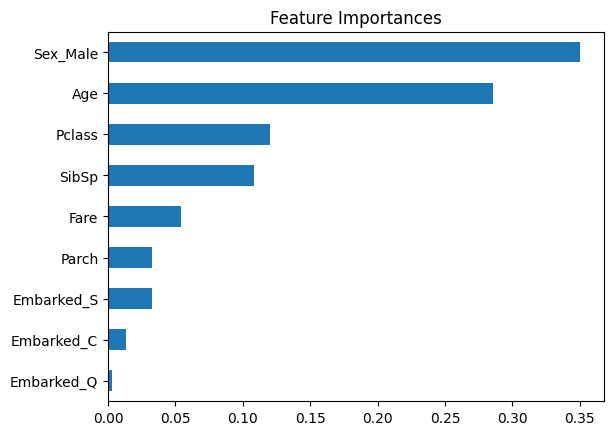

In [ ]:
# We select the characteristics of the training data
feature_names = X_train.columns

# Plot the features importante
importances = pd.Series(
    #decision_tree.feature_importances funciton to get the features.
    decision_tree.feature_importances_, index=feature_names
).sort_values(ascending=True).plot.barh()
plt.title('Feature Importances')
plt.show()

### Examine the decision tree structure

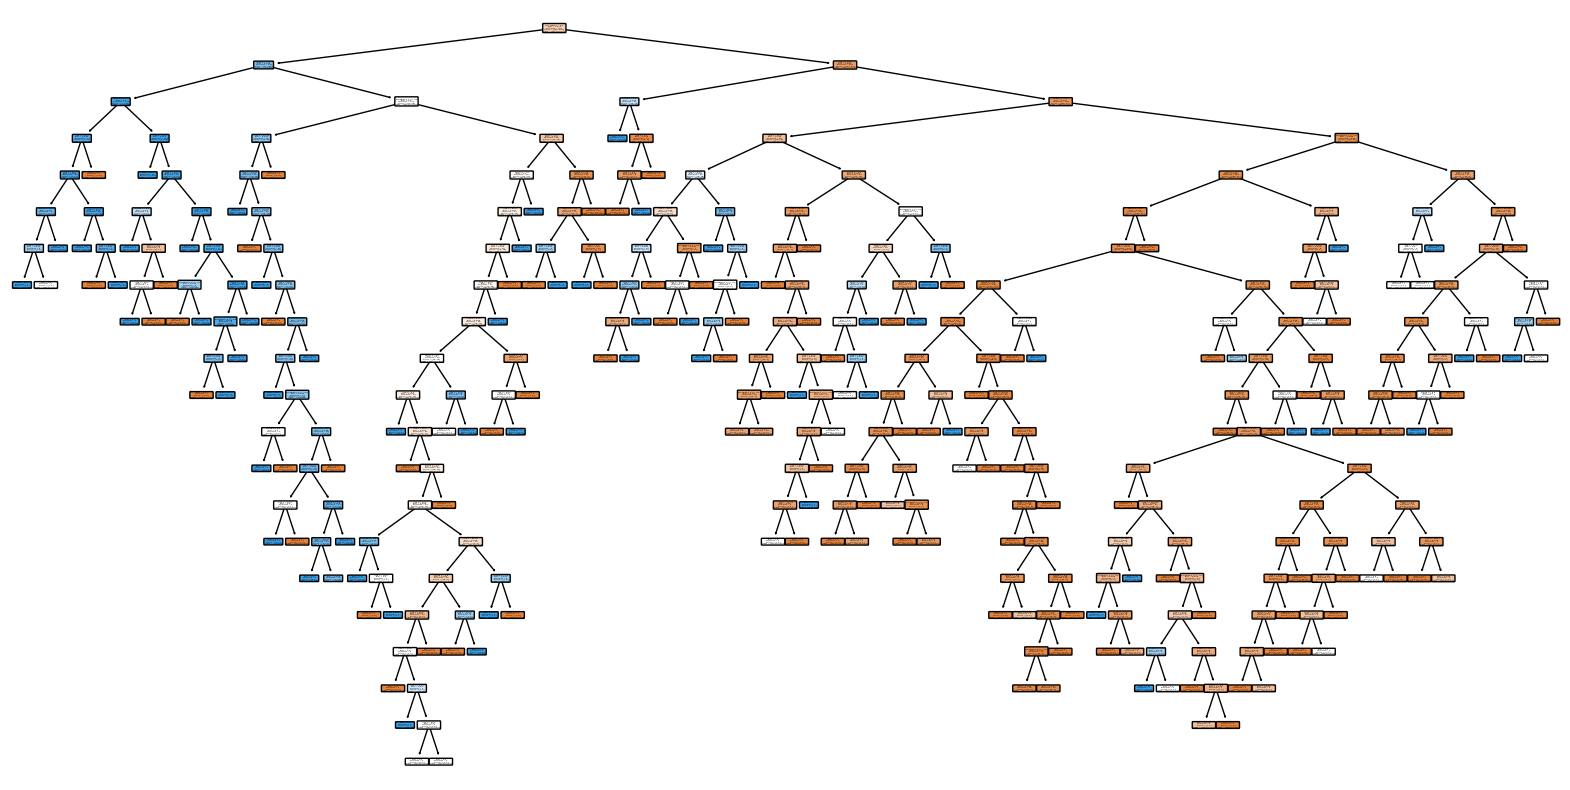


Depth of the tree: 20
Number of nodes: 349


In [ ]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(decision_tree,
        feature_names=X.columns,
        class_names=['Not Survived', 'Survived'],
        filled=True, rounded=True)
plt.show()

# Examine the decision tree structure
tree_depth = decision_tree.tree_.max_depth
num_nodes = decision_tree.tree_.node_count
print(f'\nDepth of the tree: {tree_depth}')
print(f'Number of nodes: {num_nodes}')

Perform tree pruning and retrain the model:

Number of nodes in the last tree is: 1 with ccp_alpha: 0.14143710498059758


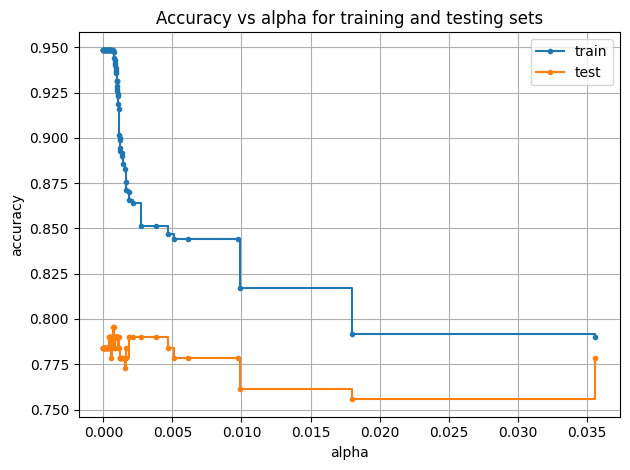

In [ ]:
path = decision_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# We train a decision tree using the effective alpha. The last value
# in ``ccp_alphas`` is the alpha value that prunes the whole tree,
# leaving the tree, ``clfs[-1]``, with one node.
clf_list = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=101, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clf_list.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clf_list[-1].tree_.node_count, ccp_alphas[-1]
    )
)

# We remove the last element in ``clfs`` and ``ccp_alphas``,
# because it is the trivial tree with only one node.
clfs = clf_list[:-1]
ccp_alphas = ccp_alphas[:-1]

# Accuracy vs alpha for training and testing sets
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='.', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='.', label="test", drawstyle="steps-post")
ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

When ``ccp_alpha`` is set to zero and keeping the other default parameters
of :class:`DecisionTreeClassifier`, the tree overfits, leading to
a 95% training accuracy and 78% testing accuracy. As alpha increases, more
of the tree is pruned, thus creating a decision tree that generalizes better.
In this example, setting ``ccp_alpha=[0.004, 0.01]`` maximizes the testing accuracy.

### Retrain with Pruning

In [ ]:
clf = DecisionTreeClassifier(random_state=101, ccp_alpha=0.01)
clf.fit(X_train, y_train)
print(f"Train accuracy: {clf.score(X_train, y_train):.3f}")
print(f"Test accuracy: {clf.score(X_test, y_test):.3f}")

Train accuracy: 0.817
Test accuracy: 0.761


In [ ]:
print(f"Decision Tree Depth: {clf.get_depth()}")
print(f"Decision Tree Node Count: {clf.tree_.node_count}")

Decision Tree Depth: 3
Decision Tree Node Count: 9


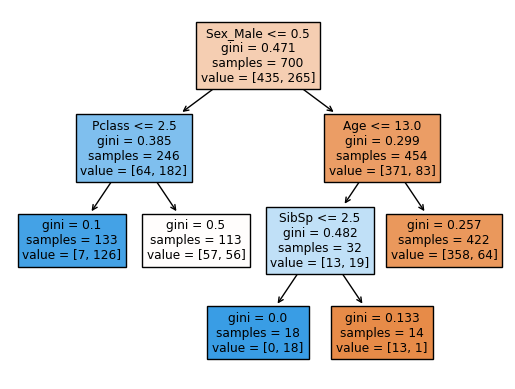

In [ ]:
plot_tree(clf, feature_names=feature_names, filled=True)
plt.show()

### Classification report after prunning:

In [ ]:
yhat = clf.predict(X_test)
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.72      0.97      0.83       104
           1       0.92      0.46      0.61        72

    accuracy                           0.76       176
   macro avg       0.82      0.71      0.72       176
weighted avg       0.80      0.76      0.74       176



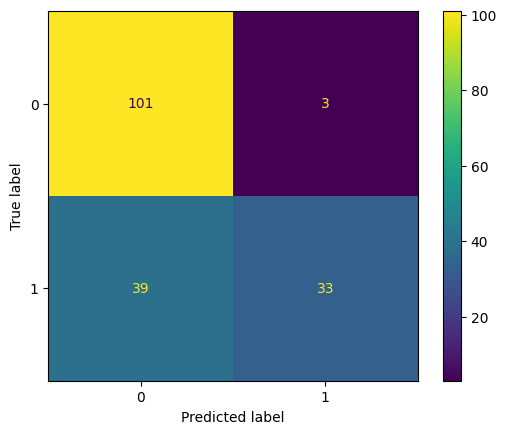

In [ ]:
cm = confusion_matrix(y_test, yhat)
cm_display = ConfusionMatrixDisplay(cm).plot()

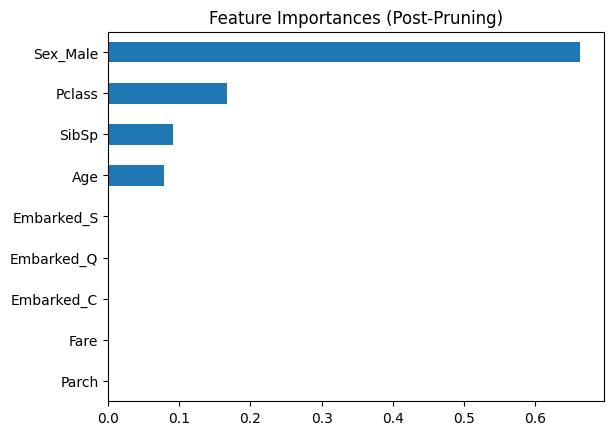

In [ ]:
importances = pd.Series(
    clf.feature_importances_, index=feature_names
).sort_values(ascending=True)
importances.plot.barh()
plt.title('Feature Importances (Post-Pruning)')
plt.show()

In [ ]:
print(importances.sort_values(ascending=False))

Sex_Male      0.663785
Pclass        0.167213
SibSp         0.091049
Age           0.077952
Parch         0.000000
Fare          0.000000
Embarked_C    0.000000
Embarked_Q    0.000000
Embarked_S    0.000000
dtype: float64


<b>Class-Specific Metrics:</b>

 1. <b>Class 0 (e.g., Negative class, Not Spam, etc.):</b>

- Precision (0.72): Out of all the instances predicted as class 0, 72% were correctly classified.

- Recall (0.97): Out of all the actual instances of class 0, 97% were correctly identified by the model.

- F1-Score (0.83): The harmonic mean of precision and recall, balancing both metrics. It indicates a good trade-off between precision and recall for class 0.

- Support (104): The number of actual occurrences of class 0 in the dataset.

 2. <b>Class 1 (e.g., Positive class, Spam, etc.):</b>

- Precision (0.92): Out of all the instances predicted as class 1, 92% were correctly classified.

- Recall (0.46): Out of all the actual instances of class 1, 46% were correctly identified by the model.

- F1-Score (0.61): The harmonic mean of precision and recall, balancing both metrics. The lower recall significantly impacts this score.
- Support (72): The number of actual occurrences of class 1 in the dataset.

<b>Overall Metrics:</b>

  3. <b>Accuracy (0.76):</b>

- The proportion of total correct predictions out of all predictions. This means the model correctly classified 76% of all instances.

 4. <b>Macro Average:</b>

- Precision (0.82): The unweighted average of precision for both classes.
- Recall (0.71): The unweighted average of recall for both classes.
- F1-Score (0.72): The unweighted average of the F1-scores for both classes.
- These metrics treat all classes equally regardless of their support, giving a sense of the model's performance across all classes.

5. <b>Weighted Average:</b>

 - Precision (0.80): The average precision weighted by the number of instances in each class.
Recall (0.76): The average recall weighted by the number of instances in each class.

 - F1-Score (0.74): The average F1-score weighted by the number of instances in each class.
These metrics account for the imbalance in the dataset, giving more importance to the class with more instances.

<b>Interpretation:</b>

- Class 0 Performance: The model performs very well on class 0, with high precision, recall, and F1-score. This indicates the model is good at identifying class 0 and has few false positives and false negatives.

- Class 1 Performance: The model performs less well on class 1, with high precision but low recall. This indicates that while most predictions for class 1 are correct, many actual instances of class 1 are missed (i.e., false negatives).

- Overall Performance: The overall accuracy of 76% suggests that the model performs reasonably well but has room for improvement, particularly in identifying class 1 instances. The weighted average metrics provide a balanced view, showing that while the precision is relatively high, the recall and F1-score could be improved.

<b>Next Steps:</b>
- Improve Recall for Class 1: Investigate why the model is missing many class 1 instances. Collecting more data for class 1, adjusting class weights, or further tuning the model.
- Balanced Performance: Strive for a more balanced recall and precision across both classes to ensure the model performs well for all instances.